In [16]:
import pandas as pd
import numpy as np
# import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
# import sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Step 2: Upload dataset
# uploaded = files.upload()  # Upload your dataset file here
walmart = pd.read_csv('C:/Users/dell xps 15/Desktop/dataset/walmart.csv')  # Replace with your file name
print(walmart.head())  # Display first 5 rows of data to confirm it's loaded



   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [17]:
walmart.shape

(6435, 8)

getting some information about the dataset

In [18]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# checking the missing value

In [19]:
walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Handling missing value with mean  

mean - average value
mode - most repeated value

#mean value of  'Date' column
data['Date'].mean()


data['Date'].fillna(data['Date'].mean(), inplace=True)  

Replacing the missing value with mode


mode_of_outlet_size = data.pivot_table(values = 'Outlet_size', columns = 'Outlet_type ', aggfunc = (lamda x: x.mode()[0]))

print (mode_of_outlet_size)


Replacing  missing value with the mode
data.loc[missing_value, 'Outlet_size'] = data.loc[missing_values, 'outlet_type'].apply(lamda x: mode_of_outlet_size)

In [20]:
walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Data Analysis

#To check statistical measure about the data
data.descibe()

Numerical features of the data

In [21]:
# Convert Date column to datetime format
walmart["Date"] = pd.to_datetime(walmart["Date"], format="%d-%m-%Y")

Displaying the distribution of entities in a graph plot

plt.figure(figsize = (6, 6))
sns.distplot(data['entity'])
plt.show()

Showing year column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'year entity column', data=data)
plt.show()

Data preprocessing using LabelEncoding

data['Date'].value_counts()

after showing the count we will replace all the string value to two values of the string

In [22]:
walmart['Store'].value_counts()

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64

label encoding


In [ ]:
# from sklearn.calibration import LabelEncoder # type: ignore


# encoder = LabelEncoder()

In [ ]:
# walmart['Store'] = encoder.fit_transform(walmart['Store'])

# walmart['Date'] = encoder.fit_transform(walmart['Date'])

# walmart['Weekly_Sales'] = encoder.fit_transform(walmart['Weekly_Sales'])

# walmart['Holiday_Flag'] = encoder.fit_transform(walmart['Holiday_Flag'])

# walmart['Temperature'] = encoder.fit_transform(walmart['Temperature'])

# walmart['Fuel_Price'] = encoder.fit_transform(walmart['Fuel_Price'])

# walmart['CPI'] = encoder.fit_transform(walmart['CPI'])

# walmart['Unemployment'] = encoder.fit_transform(walmart['Unemployment'])


In [23]:
print(walmart.head()) 

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


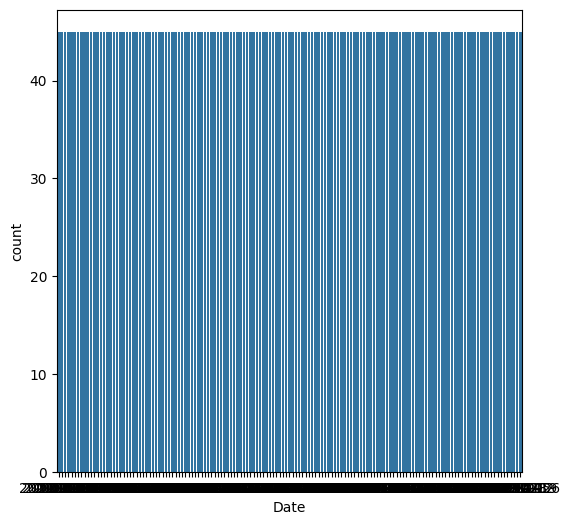

In [24]:
plt.figure(figsize = (6, 6))
sns.countplot(x = 'Date', data=walmart)
plt.show()

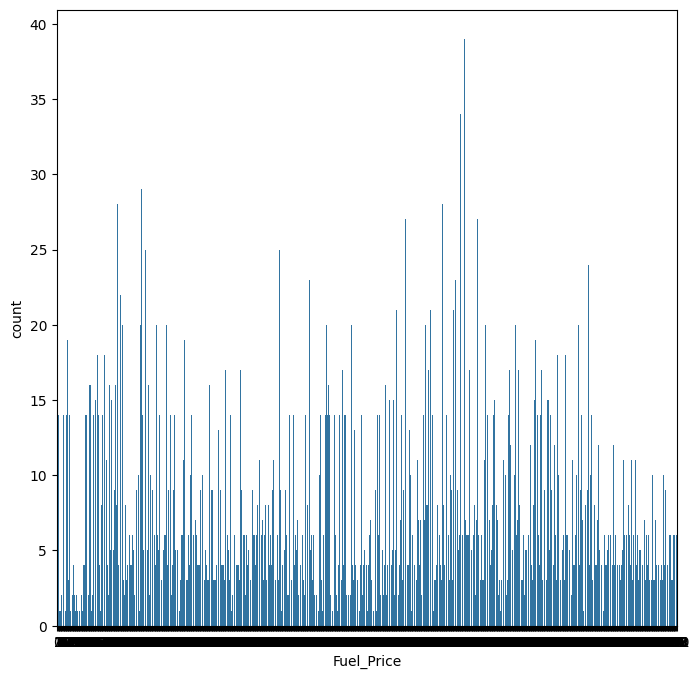

In [18]:
plt.figure(figsize = (8, 8))
sns.countplot(x = 'Fuel_Price', data=walmart)
plt.show()